## NLP with LSTM on Keras

- https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/

In [2]:
import numpy as np
import pylab as plt

# Keras module
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, LSTM, Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding

from sklearn.model_selection import train_test_split
np.random.seed(7)

## Loading and preprocessing the data

- Load imdb data from keras.datasets
- Join the train and test (both equal) to make one big data
- Pad the data (Since different reviews have different length)
- split the data into train/test/val


In [9]:
top_words = 5000
max_words = 500
def load_data(top_words=5000, max_words = 500):
    (X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)
    # pad the sequences
    X_train = sequence.pad_sequences(X_train, maxlen=max_words)
    X_test = sequence.pad_sequences(X_test, maxlen=max_words)
    X=np.concatenate((X_train, X_test), axis=0)
    y=np.concatenate((y_train, y_test), axis=0)
    
    
    X_train_, X_test, y_train_, y_test = train_test_split(X, y, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(X_train_, y_train_, test_size=0.25)

    print (f"X_train.shape: {X_train.shape} y_train.shape:{y_train.shape}" )
    print (f"X_test.shape: {X_test.shape} y_test.shape:{y_test.shape}" )
    print (f"X_val.shape: {X_val.shape} y_val.shape:{y_val.shape}" )
        
    
    return (X_train, y_train, X_test, y_test, X_val, y_val)

(X_train, y_train, X_test, y_test, X_val, y_val) = load_data(top_words=top_words, 
                                                             max_words = max_words)


X_train.shape: (30000, 500) y_train.shape:(30000,)
X_test.shape: (10000, 500) y_test.shape:(10000,)
X_val.shape: (10000, 500) y_val.shape:(10000,)


In [8]:
print(y_train[0], X_train[11])

1 [2277   39 1859    2   60   48   36   26 4278    5 4170    7    2   10
   10   14  390    9  530   51    2   14    2    9   52  154 3357 4826
   14  390    9   31    7    4   91    2    7    2    2    5    2    4
 2776   13   28  126  110   11   61 2646 1025  147  113 1351  133    9
 3009    5    2   10   10   31    7    4   91  906  411    9   54    4
 4278 4452    2  301  142    8    4  962   75  122    4  172  155   11
    4    2    2  325    2    8    4  880    7    2 3699   37   71 2947
    8 2910   68 2517    2   39  112 3255    2   17    2   18  880  174
 1227   11    4  403    7    4 4098    7    4    2  142    2  115  981
    8   30  623 1227   10   10  342 1536 2022 3539  671   70   30  343
   18   52   60   39   35 4179 1536   14  671   70   30  343    8    2
  305    7 2330 2691    2   70  850   39   68 2497   60    6 1676   70
   67    4  641   48  348  195 1434    8   81   38   10   10  518   12
  304  565    2   21   75   32   70 3290   56    5  653  263  532    2
  77

## Model Building with LSTM

- First: Embedded layer that uses 32 length vectors to represent each word.
- Add LSTM with 100 neurons.
- Finally add a Dense layer with sigmoid activation as this is a binary classification problem ( Hence just a single neuron).


In [15]:
def make_model(X, y, embedding_length = 16):
    model = Sequential()
    model.add(Embedding(top_words, embedding_length, input_length=X.shape[1]))
    model.add(LSTM(16))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model1 = make_model(X_train, y_train)
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 16)           80000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 82,129
Trainable params: 82,129
Non-trainable params: 0
_________________________________________________________________


In [17]:
history1 = model1.fit(X_train, y_train,
                    validation_data=(X_val, y_val), 
                    epochs=5,
                    batch_size=128,
                    verbose=1)

Epoch 1/5
235/235 [==============================] - 56s 237ms/step - loss: 0.2964 - accuracy: 0.8818 - val_loss: 0.3072 - val_accuracy: 0.8745
Epoch 2/5
235/235 [==============================] - 69s 294ms/step - loss: 0.2630 - accuracy: 0.8988 - val_loss: 0.3237 - val_accuracy: 0.8630
Epoch 3/5
235/235 [==============================] - 61s 258ms/step - loss: 0.2392 - accuracy: 0.9085 - val_loss: 0.2943 - val_accuracy: 0.8791
Epoch 4/5
235/235 [==============================] - 58s 245ms/step - loss: 0.2266 - accuracy: 0.9138 - val_loss: 0.3165 - val_accuracy: 0.8617
Epoch 5/5
235/235 [==============================] - 78s 333ms/step - loss: 0.2130 - accuracy: 0.9190 - val_loss: 0.2998 - val_accuracy: 0.8873


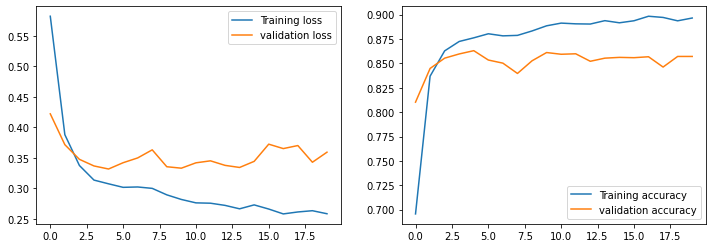

In [11]:
def plot_history(history):
    
    plt.figure(figsize=(12,4))
    plt.subplot(121)
    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='validation loss')
    plt.legend()

    plt.subplot(122)
    plt.plot(history.history['accuracy'], label='Training accuracy')
    plt.plot(history.history['val_accuracy'], label='validation accuracy')
    plt.legend()

plot_history(history1)

This is a clear case of over fitting. The validation loss start going up after 3 epochs. The validation accuracy have aalso decreasing after that epoch.

In [14]:
history1 = model1.fit(X_train, y_train,
                    validation_data=(X_val, y_val), 
                    epochs=5,
                    batch_size=128,
                    verbose=1)

Epoch 1/20


InvalidArgumentError:  indices[120,460] = 2359 is not in [0, 500)
	 [[node sequential_1/embedding_1/embedding_lookup (defined at <ipython-input-13-728f9e250db0>:1) ]] [Op:__inference_train_function_3682]

Errors may have originated from an input operation.
Input Source operations connected to node sequential_1/embedding_1/embedding_lookup:
 sequential_1/embedding_1/embedding_lookup/2484 (defined at /usr/local/Cellar/python@3.8/3.8.5/Frameworks/Python.framework/Versions/3.8/lib/python3.8/contextlib.py:113)

Function call stack:
train_function


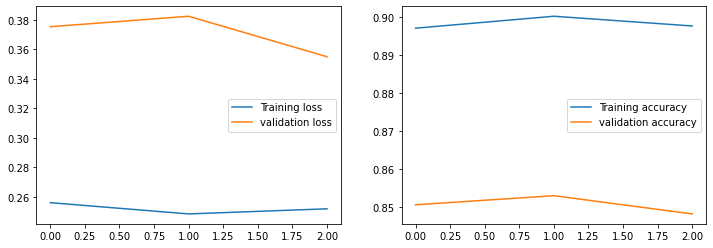

In [13]:
plot_history(history1)

In [14]:
score = model1.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

782/782 [==============================] - 32s 40ms/step - loss: 0.3414 - accuracy: 0.8536
Accuracy: 85.36%


A nice 85 % accuaracy on the test set. Which is close to the validation accuracy.

### Dropout

Keras provides this capability with parameters on the LSTM layer, the dropout for configuring the input dropout and recurrent_dropout for configuring the recurrent dropout.

In [15]:
def make_model(X, embedding_length = 32):
    model = Sequential()
    model.add(Embedding(top_words, embedding_length, input_length=X.shape[1]))
    model.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model2 = make_model(X_train, embedding_length = 16)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 500, 16)           16000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 18,129
Trainable params: 18,129
Non-trainable params: 0
_________________________________________________________________


In [16]:
history2 = model2.fit(X_train, y_train,
                    validation_data=(X_val, y_val), 
                    epochs=5,
                    batch_size=128,
                    verbose=1)

Epoch 1/5
147/147 [==============================] - 109s 740ms/step - loss: 0.6072 - accuracy: 0.6737 - val_loss: 0.4580 - val_accuracy: 0.8026
Epoch 2/5
147/147 [==============================] - 100s 678ms/step - loss: 0.4119 - accuracy: 0.8300 - val_loss: 0.3722 - val_accuracy: 0.8424
Epoch 3/5
147/147 [==============================] - 87s 591ms/step - loss: 0.3605 - accuracy: 0.8515 - val_loss: 0.3487 - val_accuracy: 0.8502
Epoch 4/5
147/147 [==============================] - 77s 521ms/step - loss: 0.3381 - accuracy: 0.8614 - val_loss: 0.4028 - val_accuracy: 0.8240
Epoch 5/5
147/147 [==============================] - 87s 593ms/step - loss: 0.3221 - accuracy: 0.8706 - val_loss: 0.3640 - val_accuracy: 0.8531


782/782 [==============================] - 42s 53ms/step - loss: 0.3450 - accuracy: 0.8586
Accuracy: 85.86%


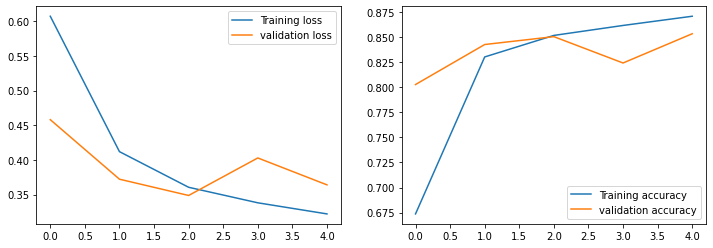

In [17]:
plot_history(history2)
score = model2.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

## LSTM and Convolutional Neural Network For Sequence Classification

We can easily add a one-dimensional CNN and max pooling layers after the Embedding layer which then feed the consolidated features to the LSTM. We can use a smallish set of 32 features with a small filter length of 3. The pooling layer can use the standard length of 2 to halve the feature map size.

In [18]:
def make_model(X, embedding_length = 32):
    model = Sequential()
    model.add(Embedding(top_words, embedding_length, input_length=X.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
4    model.add(LSTM(16))#, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model3 = make_model(X_train, embedding_length = 16)
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 500, 16)           16000     
_________________________________________________________________
conv1d (Conv1D)              (None, 500, 32)           1568      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 250, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 20,721
Trainable params: 20,721
Non-trainable params: 0
_________________________________________________________________


In [19]:
history3 = model3.fit(X_train, y_train,
                    validation_data=(X_val, y_val), 
                    epochs=5,
                    batch_size=128,
                    verbose=1)

Epoch 1/5
147/147 [==============================] - 25s 169ms/step - loss: 0.5800 - accuracy: 0.6721 - val_loss: 0.3850 - val_accuracy: 0.8302
Epoch 2/5
147/147 [==============================] - 26s 180ms/step - loss: 0.3428 - accuracy: 0.8564 - val_loss: 0.3407 - val_accuracy: 0.8515
Epoch 3/5
147/147 [==============================] - 29s 197ms/step - loss: 0.3085 - accuracy: 0.8726 - val_loss: 0.3284 - val_accuracy: 0.8608
Epoch 4/5
147/147 [==============================] - 26s 177ms/step - loss: 0.2916 - accuracy: 0.8839 - val_loss: 0.3266 - val_accuracy: 0.8592
Epoch 5/5
147/147 [==============================] - 23s 159ms/step - loss: 0.2806 - accuracy: 0.8882 - val_loss: 0.3318 - val_accuracy: 0.8530


782/782 [==============================] - 15s 20ms/step - loss: 0.3183 - accuracy: 0.8639
Accuracy: 86.39%


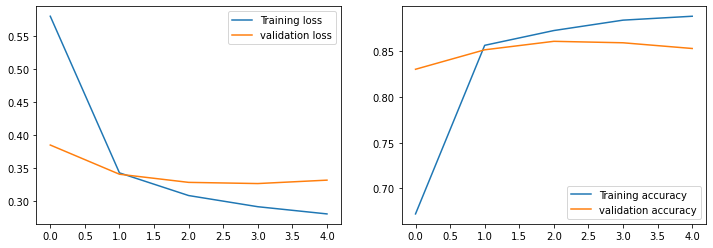

In [20]:
plot_history(history3)
score = model3.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

In [22]:
def make_model(X, embedding_length = 32):
    model = Sequential()
    model.add(Embedding(top_words, embedding_length, input_length=X.shape[1]))
    model.add(Conv1D(filters=32, kernel_size=3, padding='same', activation='relu'))
    model.add(MaxPooling1D(pool_size=2))
    model.add(LSTM(16, dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

model4 = make_model(X_train, embedding_length = 16)
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 16)           16000     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 500, 32)           1568      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 250, 32)           0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 20,721
Trainable params: 20,721
Non-trainable params: 0
_________________________________________________________________


In [23]:
history4 = model4.fit(X_train, y_train,
                    validation_data=(X_val, y_val), 
                    epochs=5,
                    batch_size=128,
                    verbose=1)

Epoch 1/5
147/147 [==============================] - 44s 299ms/step - loss: 0.5822 - accuracy: 0.6833 - val_loss: 0.4020 - val_accuracy: 0.8238
Epoch 2/5
147/147 [==============================] - 48s 325ms/step - loss: 0.3581 - accuracy: 0.8502 - val_loss: 0.3511 - val_accuracy: 0.8509
Epoch 3/5
147/147 [==============================] - 45s 305ms/step - loss: 0.3184 - accuracy: 0.8705 - val_loss: 0.3427 - val_accuracy: 0.8554
Epoch 4/5
147/147 [==============================] - 63s 426ms/step - loss: 0.3162 - accuracy: 0.8729 - val_loss: 0.3524 - val_accuracy: 0.8456
Epoch 5/5
147/147 [==============================] - 48s 324ms/step - loss: 0.2979 - accuracy: 0.8800 - val_loss: 0.3321 - val_accuracy: 0.8498


782/782 [==============================] - 18s 23ms/step - loss: 0.3201 - accuracy: 0.8626
Accuracy: 86.26%


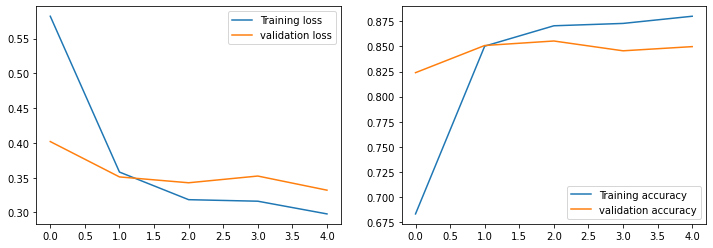

In [24]:
plot_history(history4)
score = model4.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))

In [25]:
history4 = model4.fit(X_train, y_train,
                    validation_data=(X_val, y_val), 
                    epochs=2,
                    batch_size=128,
                    verbose=1)

Epoch 1/2
147/147 [==============================] - 40s 271ms/step - loss: 0.2942 - accuracy: 0.8798 - val_loss: 0.3373 - val_accuracy: 0.8613
Epoch 2/2
147/147 [==============================] - 43s 292ms/step - loss: 0.2769 - accuracy: 0.8915 - val_loss: 0.3328 - val_accuracy: 0.8584


782/782 [==============================] - 17s 21ms/step - loss: 0.3219 - accuracy: 0.8685
Accuracy: 86.85%


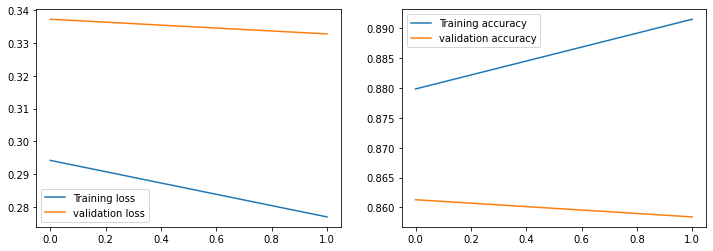

In [26]:
plot_history(history4)
score = model4.evaluate(X_test, y_test)
print("Accuracy: %.2f%%" % (score[1]*100))